### Clustering Universities: Analyzing Patterns with K-Means, Hierarchical Clustering and DBSCAN

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import  matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Universities.csv")

In [3]:
data.head(2)

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81


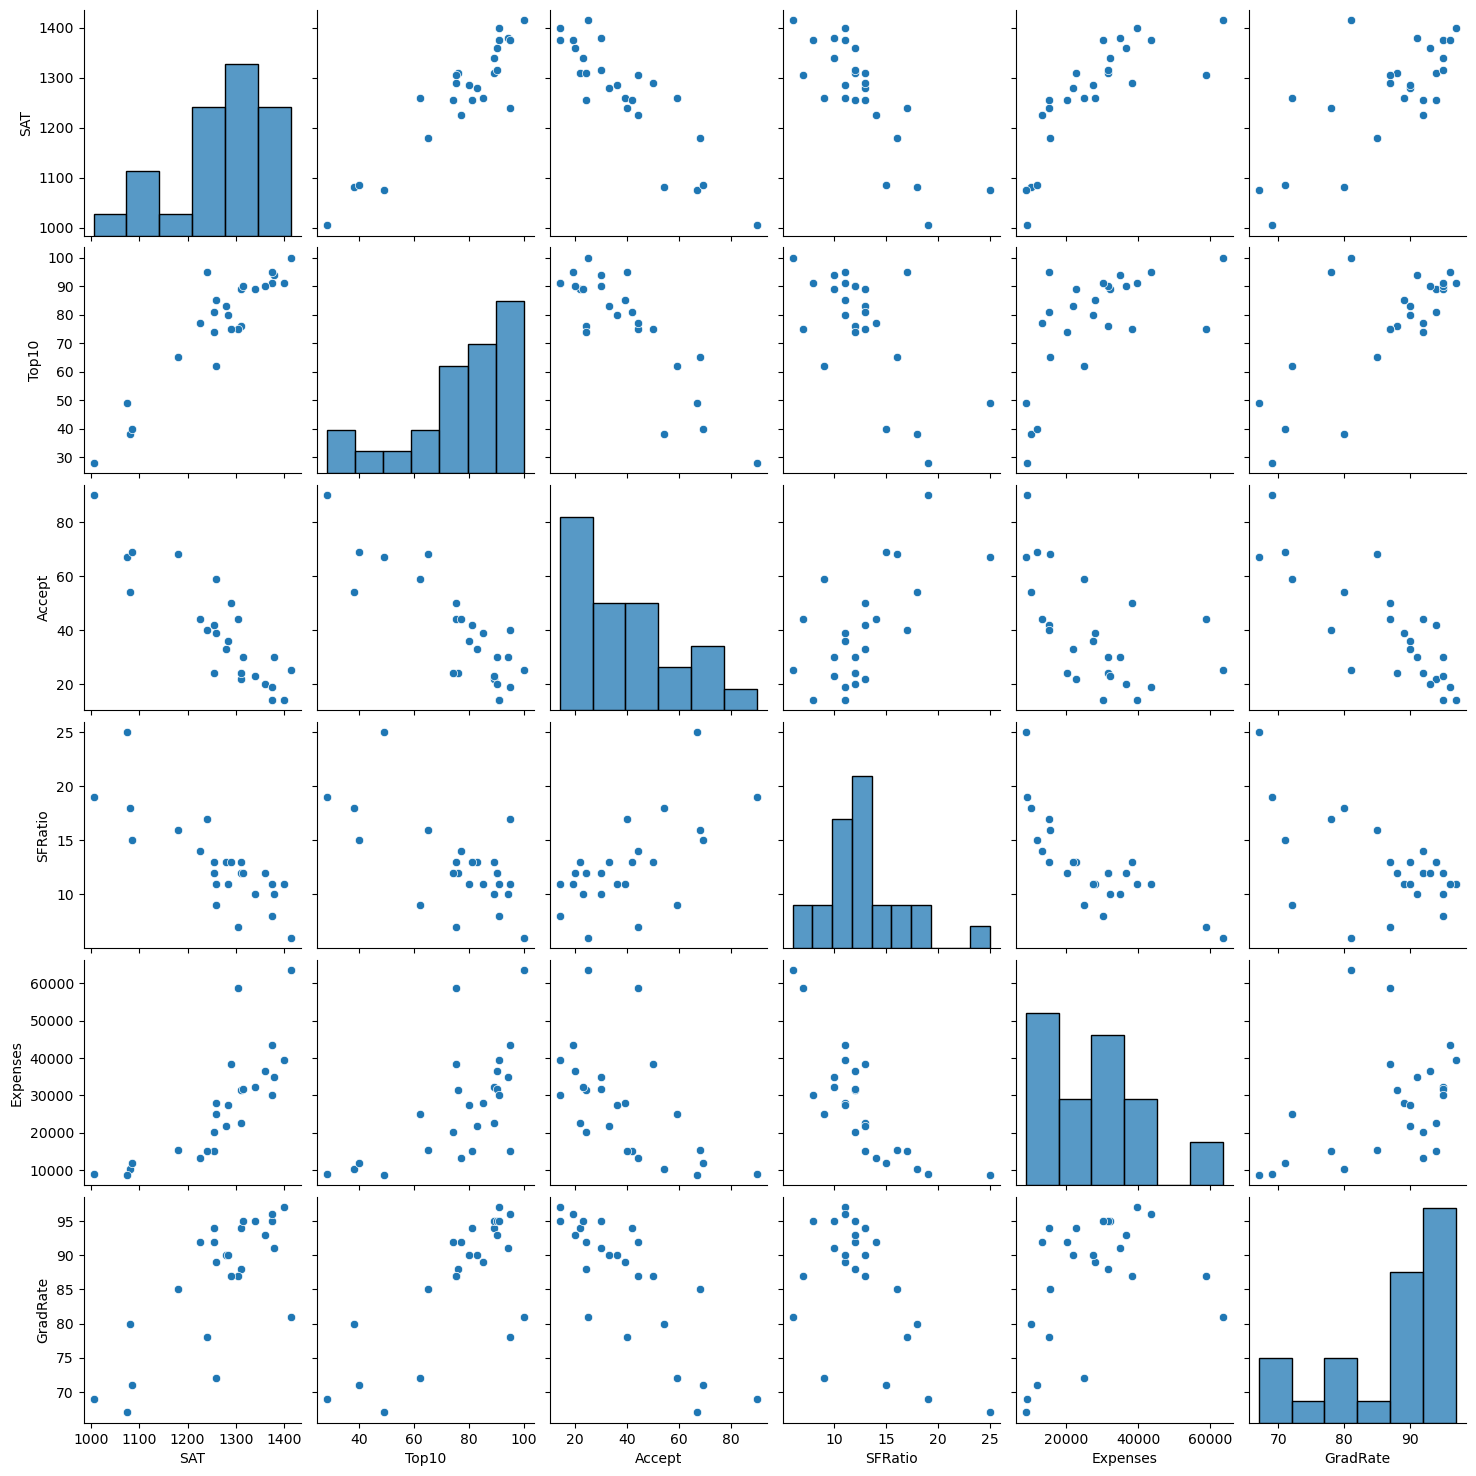

In [4]:
sns.pairplot(data=data)
plt.show()

### Hierarchical Clustering

In [6]:
import scipy.cluster.hierarchy as sc

In [7]:
data1=(data.iloc[:,1:])
data1.head(2)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81


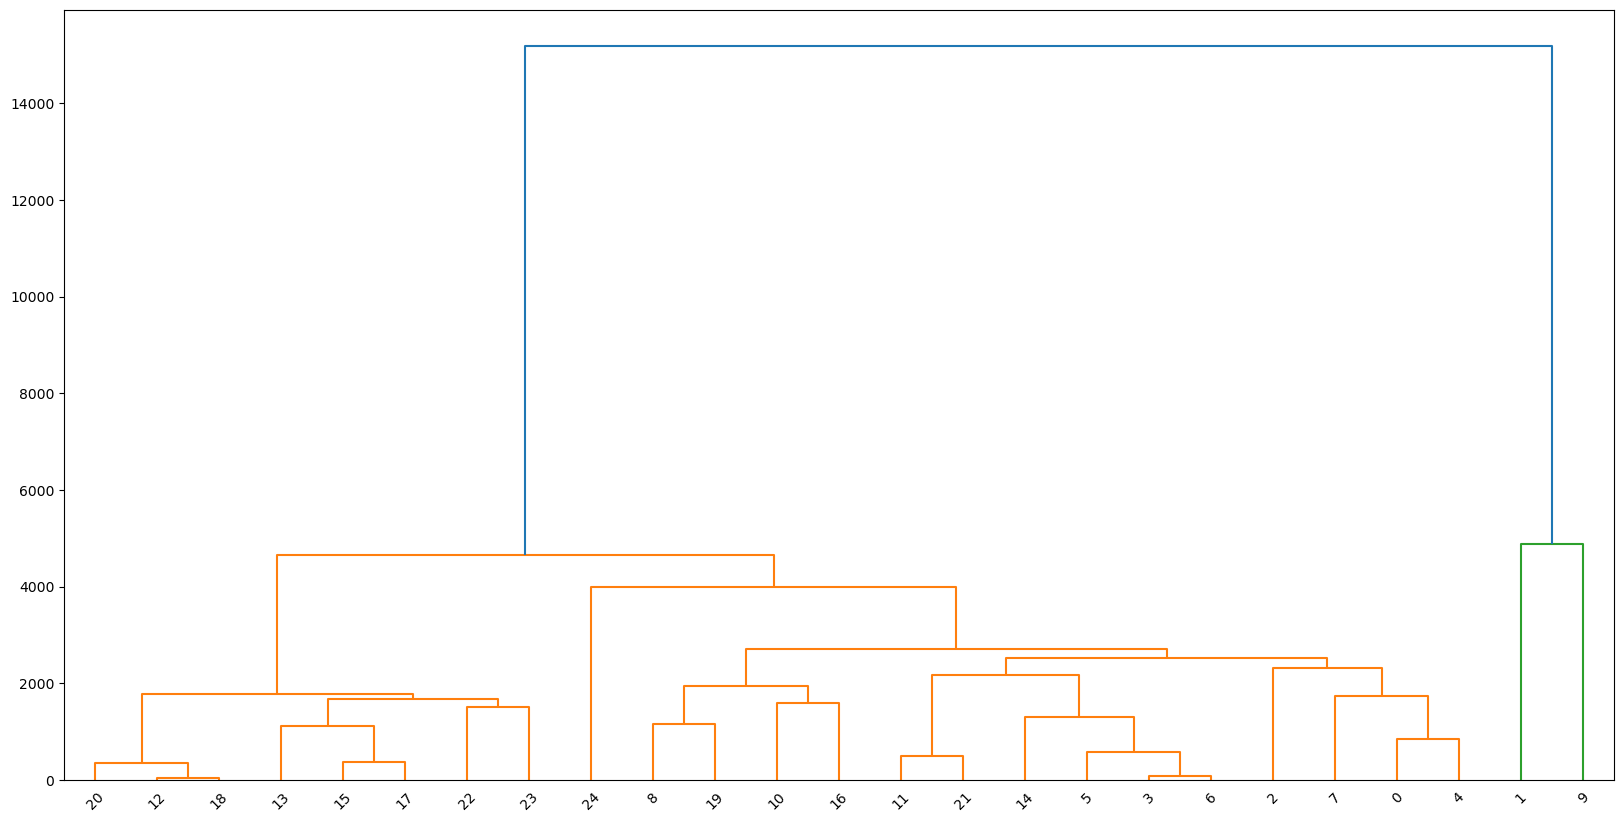

In [8]:
plt.figure(figsize=(20,10))
sc.dendrogram(sc.linkage(data1,method='single',metric='euclidean'))
plt.savefig("Demo1.jpg")
plt.show()

In [9]:
from sklearn.cluster import AgglomerativeClustering

In [10]:
ac= AgglomerativeClustering(n_clusters=2,linkage='single')
data1["Predict"]=ac.fit_predict(data1)

### K-Means Clustering

In [25]:
data1.head(2)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Predict
0,1310,89,22,13,22704,94,1
1,1415,100,25,6,63575,81,0


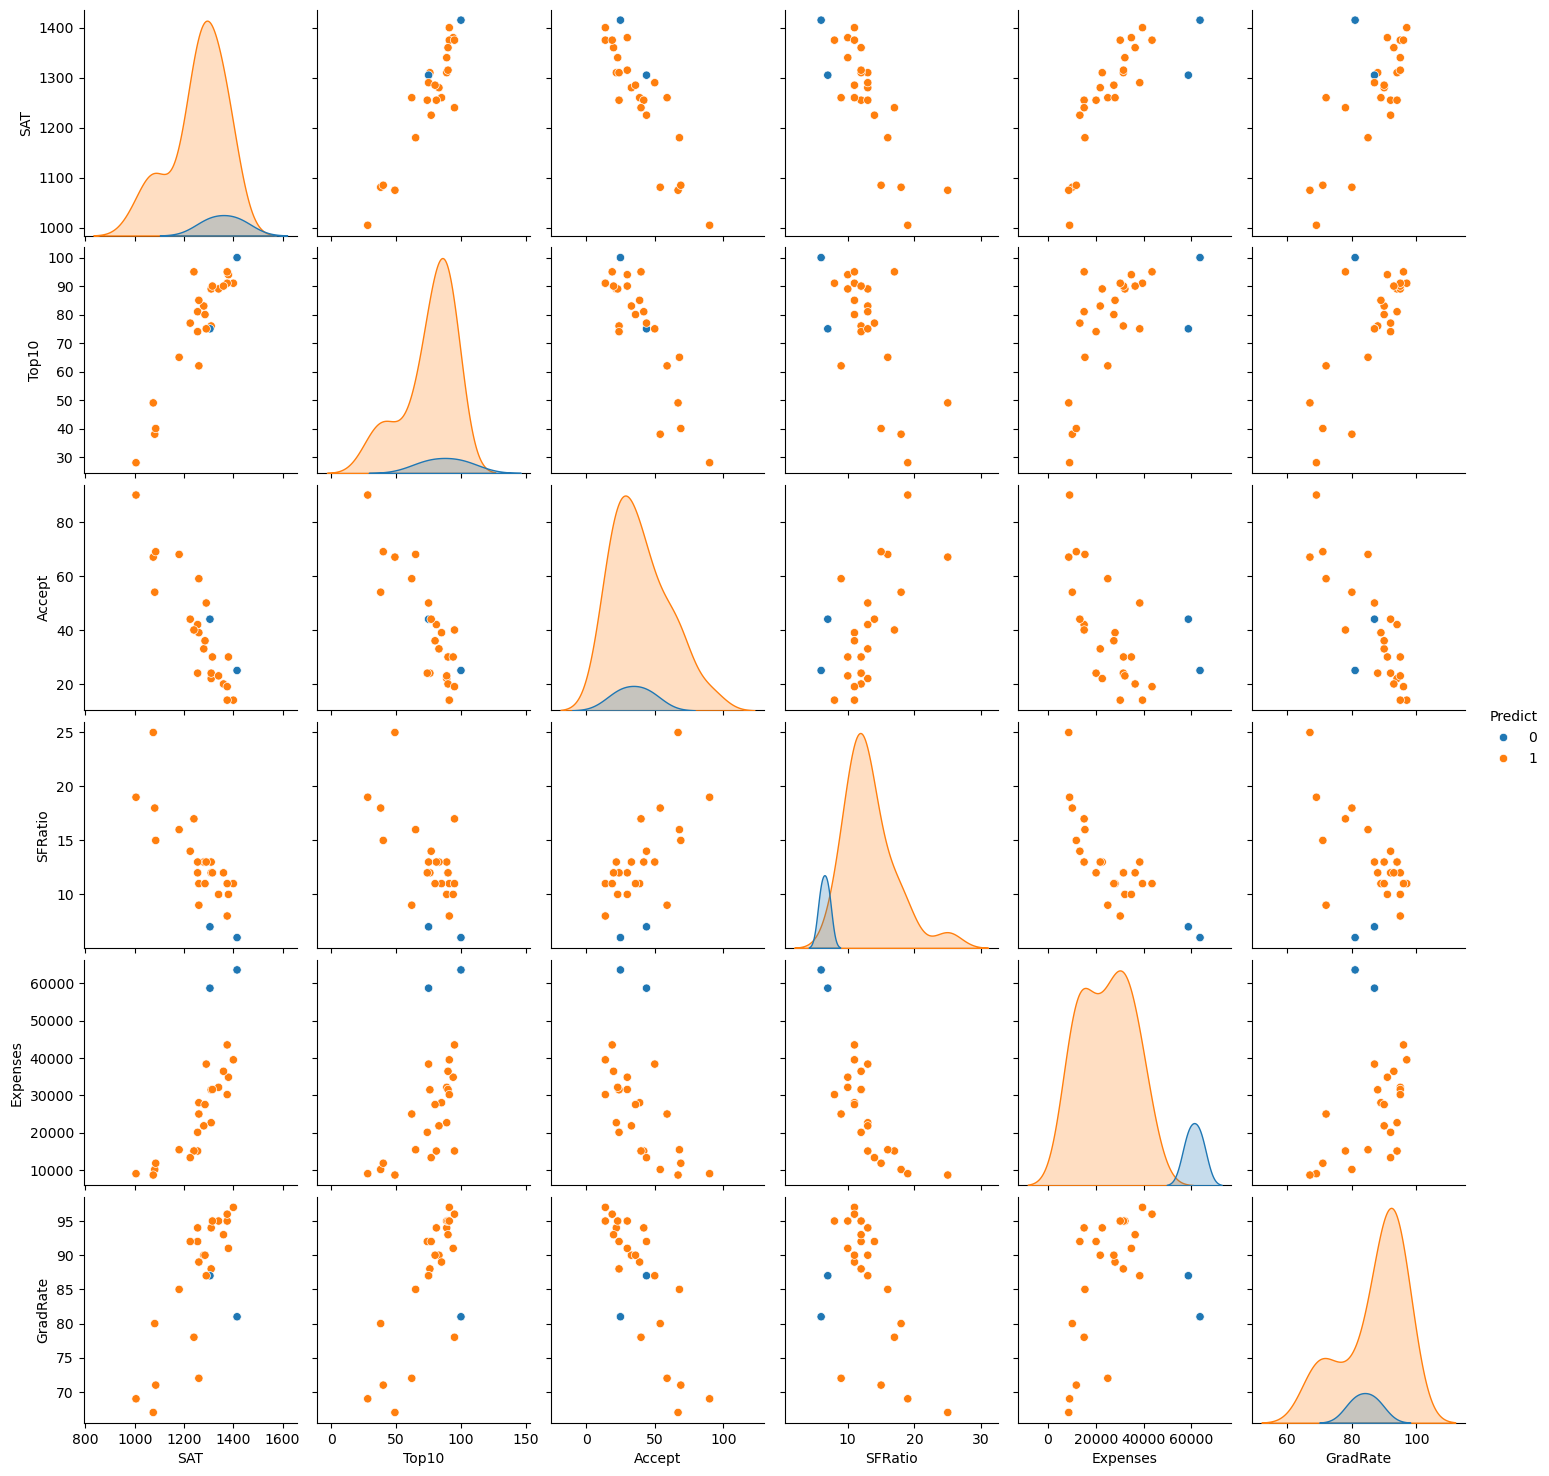

In [27]:
sns.pairplot(data=data1,hue="Predict")
plt.show()

In [29]:
from sklearn.cluster import KMeans

C:\Users\Utkarsha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Utkarsha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Utkarsha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Utkarsha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory le

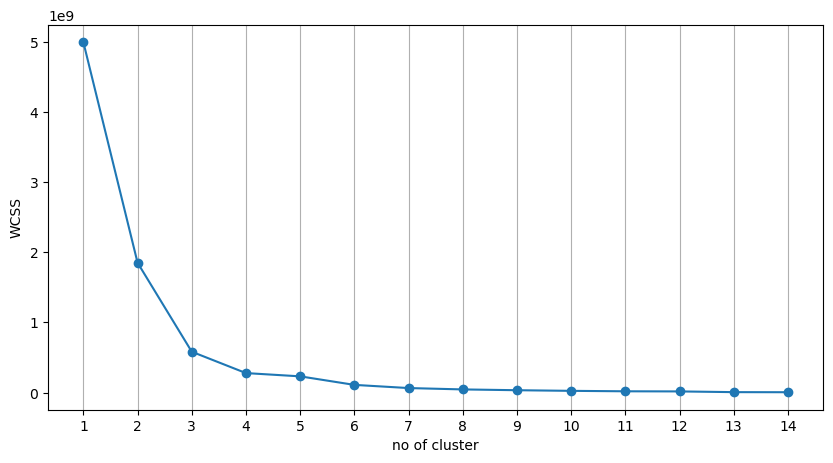

In [41]:
wcss=[]

for i in range(1,15):
    km=KMeans(n_clusters=i,init='k-means++')
    km.fit(data1)
    wcss.append(km.inertia_)

plt.figure(figsize=(10,5))
plt.plot([i for i in range(1,15)],wcss,marker="o")
plt.xlabel("no of cluster")
plt.xticks([i for i in range(1,15)])
plt.ylabel("WCSS")
plt.grid(axis="x")
plt.show()


In [56]:
kmn=KMeans(n_clusters=2)
data1["Predict"]=kmn.fit_predict(data1)

C:\Users\Utkarsha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


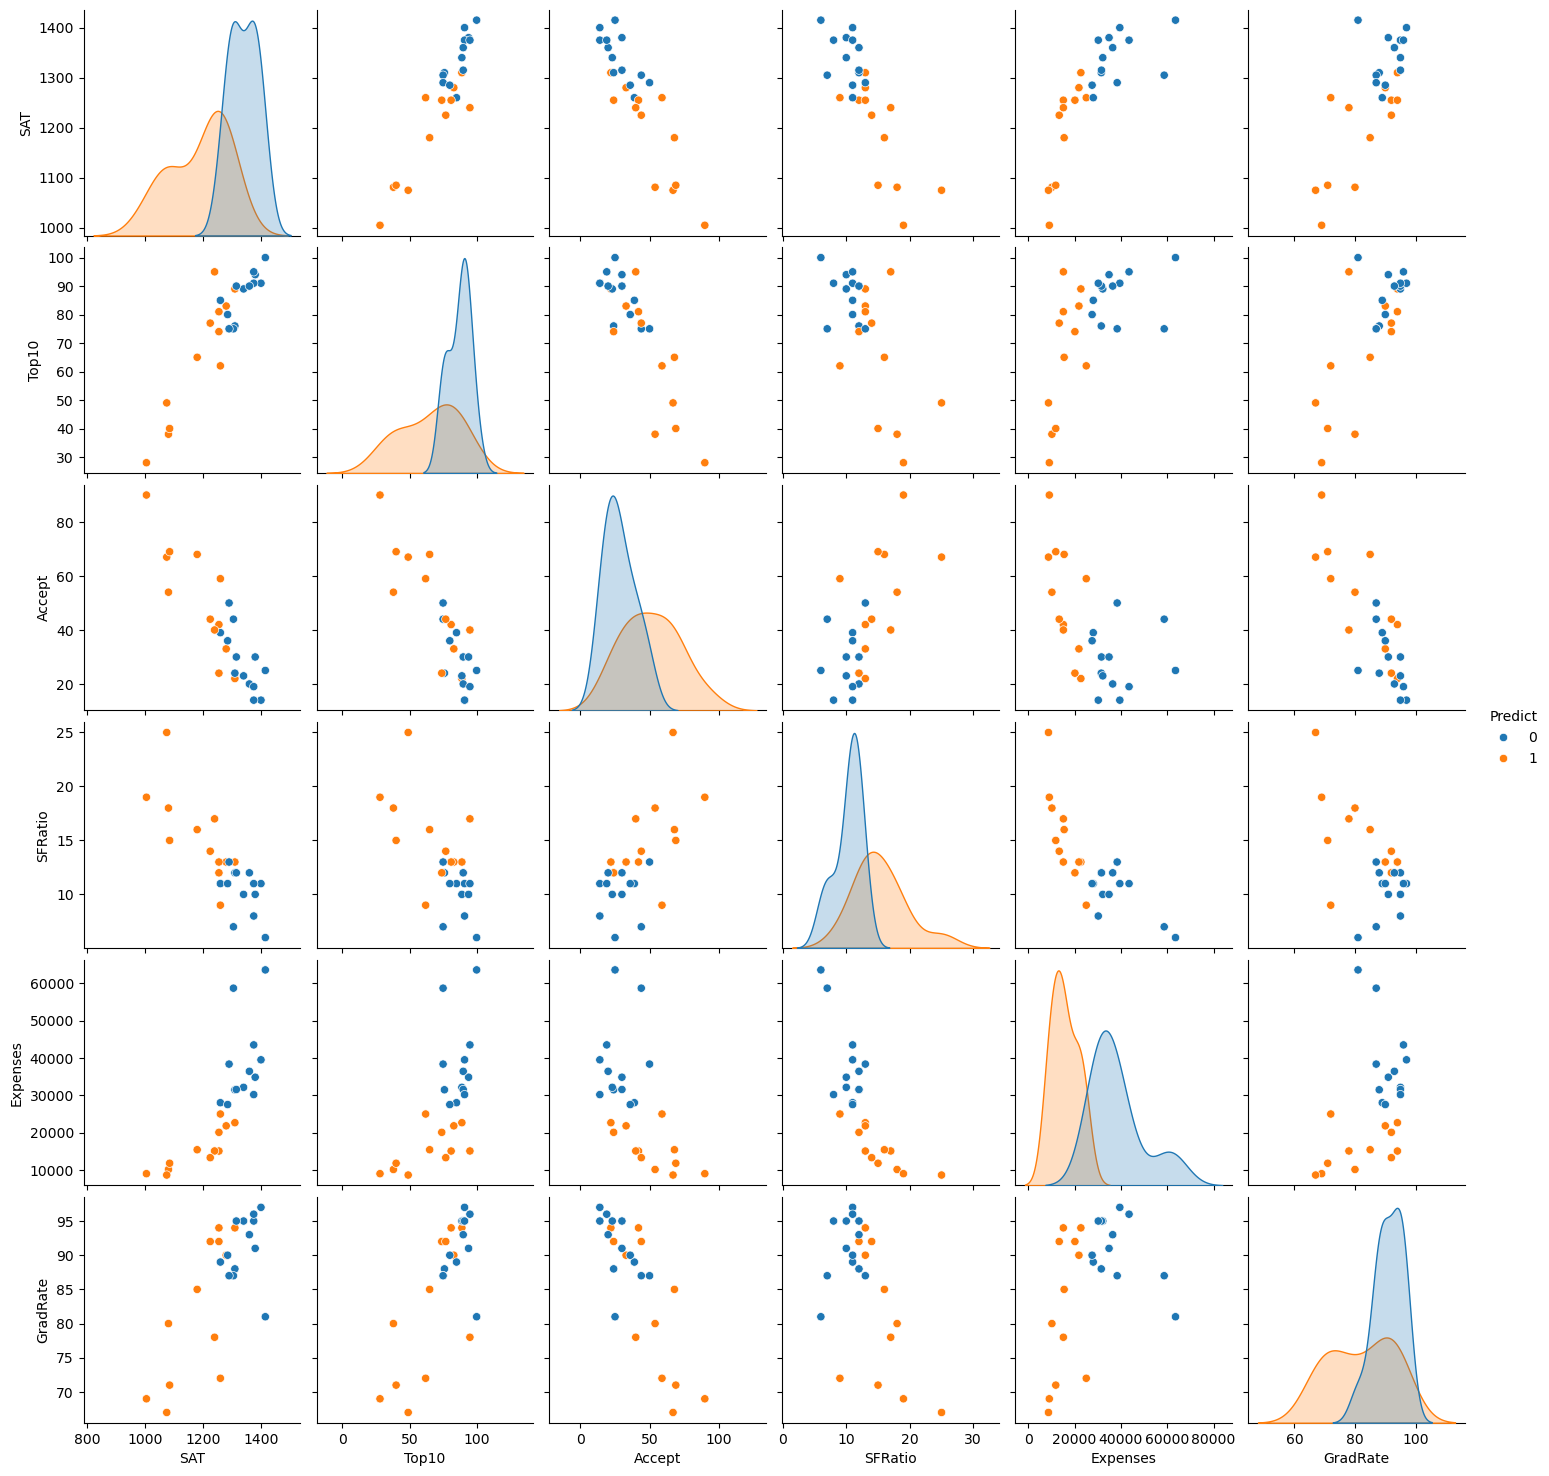

In [58]:
sns.pairplot(data=data1,hue="Predict")
plt.show()

#### Through the application of K-Means and Hierarchical Clustering techniques, universities were effectively segmented into distinct groups based on their features. The analysis revealed underlying patterns that can assist in better understanding the relationships and differences among universities.
#### K-Means clustering provided quick and intuitive segmentations, while hierarchical clustering offered a more detailed view of relationships with the dendrogram visualization. Both approaches complement each other, enhancing the interpretability and robustness of the clustering results.